# Introduction

IPython, pandas and matplotlib have a number of useful options you can use to make it easier to view and format your data. This notebook collects a bunch of them in one place. I hope this will be a useful reference.

The original blog posting is on http://pbpython.com/ipython-pandas-display-tips.html

## Import modules and some sample data

First, do our standard pandas, numpy and matplotlib imports as well as configure inline displays of plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

One of the simple things we can do is override the default CSS to customize our DataFrame output.

This specific example is from - [Brandon Rhodes' talk at pycon](https://www.youtube.com/watch?v=5JnMutdy6Fw "Pandas From The Ground Up")

For the purposes of the notebook, I'm defining CSS as a variable but you could easily read in from a file as well.

In [2]:
CSS = """
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
"""

Now add this CSS into the current notebook's HTML.

In [3]:
from IPython.core.display import HTML
HTML('<style>{}</style>'.format(CSS))

In [4]:
SALES=pd.read_csv("sample-sales-tax.csv", parse_dates=True)
SALES.head()

,account number,name,sku,category,quantity,unit price,ext price,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,0.07,40.4768,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,0.07,71.3146,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,0.07,20.2944,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,0.07,28.9380,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,0.07,125.5464,2014-01-03 08:14:27


You can see how the CSS is now applied to the DataFrame and how you could easily modify it to customize it to your liking.

Jupyter notebooks do a good job of automatically displaying information but sometimes you want to force data to display. Fortunately, ipython provides and option. This is especially useful if you want to display multiple dataframes.

In [5]:
from IPython.display import display

In [6]:
display(SALES.head(2))
display(SALES.tail(2))
display(SALES.describe())

,account number,name,sku,category,quantity,unit price,ext price,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,0.07,40.4768,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,0.07,71.3146,2014-07-29 02:10:44


,account number,name,sku,category,quantity,unit price,ext price,Tax rate,Tax amount,date
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,0.07,61.8786,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,0.07,73.3334,2014-06-27 05:58:33


,account number,quantity,unit price,ext price,Tax rate,Tax amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,535208.897000,10.328000,56.179630,579.84390,0.035863,20.058881
std,277589.746014,5.687597,25.331939,435.30381,0.025598,22.463583
min,93356.000000,1.000000,10.060000,10.38000,0.003000,0.202050
25%,299771.000000,5.750000,35.995000,232.60500,0.015000,5.327175
50%,563905.000000,10.000000,56.765000,471.72000,0.030000,13.169800
75%,750461.000000,15.000000,76.802500,878.13750,0.040000,26.302725
max,995267.000000,20.000000,99.970000,1994.80000,0.150000,191.250000


## Using pandas settings to control output

Pandas has many different options to control how data is displayed.

You can use max_rows to control how many rows are displayed

In [7]:
pd.set_option("display.max_rows",4)

In [8]:
SALES

,account number,name,sku,category,quantity,unit price,ext price,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,0.07,40.4768,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,0.07,71.3146,2014-07-29 02:10:44
...,...,...,...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,0.07,61.8786,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,0.07,73.3334,2014-06-27 05:58:33


Depending on the data set, you may only want to display a smaller number of columns.

In [9]:
pd.set_option("display.max_columns",6)

In [10]:
SALES

,account number,name,sku,...,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,...,0.07,40.4768,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,...,0.07,71.3146,2014-07-29 02:10:44
...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,...,0.07,61.8786,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,...,0.07,73.3334,2014-06-27 05:58:33


You can control how many decimal points of precision to display

In [11]:
pd.set_option('precision',2)

In [12]:
SALES

,account number,name,sku,...,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,...,0.07,40.48,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,...,0.07,71.31,2014-07-29 02:10:44
...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,...,0.07,61.88,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,...,0.07,73.33,2014-06-27 05:58:33


In [13]:
pd.set_option('precision',7)

In [14]:
SALES

,account number,name,sku,...,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,...,0.07,40.4768,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,...,0.07,71.3146,2014-07-29 02:10:44
...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,...,0.07,61.8786,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,...,0.07,73.3334,2014-06-27 05:58:33


You can also format floating point numbers using float_format

In [15]:
pd.set_option('float_format', '{:.2f}'.format)

In [16]:
SALES

,account number,name,sku,...,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,...,0.07,40.48,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,...,0.07,71.31,2014-07-29 02:10:44
...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,...,0.07,61.88,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,...,0.07,73.33,2014-06-27 05:58:33


This does apply to all the data. In our example, applying dollar signs to everything would not be correct for this example.

In [17]:
pd.set_option('float_format', '${:.2f}'.format)

In [18]:
SALES

,account number,name,sku,...,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,...,$0.07,$40.48,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,...,$0.07,$71.31,2014-07-29 02:10:44
...,...,...,...,...,...,...,...
998,304860,Huel-Haag,LL-46261,...,$0.07,$61.88,2014-07-26 01:10:57
999,98022,Heidenreich-Bosco,LW-86841,...,$0.07,$73.33,2014-06-27 05:58:33


## Improving your plots

I have mentioned before how the default pandas plots don't look so great. Fortunately, there are style sheets in matplotlib which go a long way towards improving the visualization of your data.

Here is a simple plot with the default values.

<AxesSubplot:xlabel='name'>

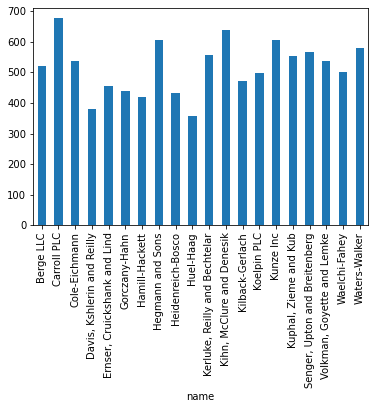

In [22]:
SALES.groupby('name')['quantity'].sum().plot(kind="bar")

We can use some of the matplolib styles available to us to make this look better.
http://matplotlib.org/users/style_sheets.html

In [23]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='name'>

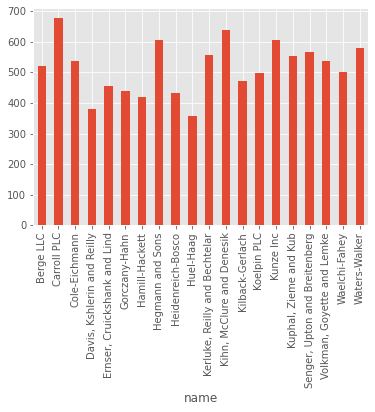

In [24]:
SALES.groupby('name')['quantity'].sum().plot(kind="bar")

You can see all the styles available

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('bmh')

<AxesSubplot:xlabel='name'>

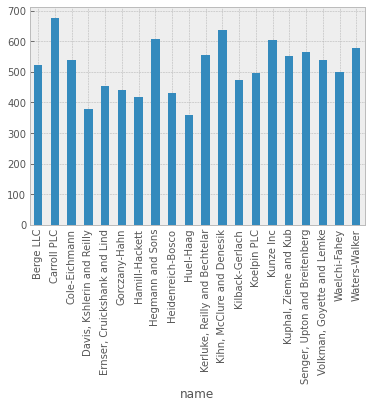

In [27]:
SALES.groupby('name')['quantity'].sum().plot(kind="bar")

In [28]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='name'>

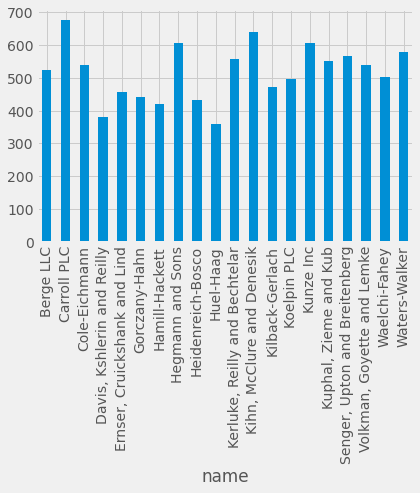

In [29]:
SALES.groupby('name')['quantity'].sum().plot(kind="bar")

Each of the different styles have subtle (and not so subtle) changes. Fortunately it is easy to experiment with them and your own plots.


You can find other articles at [Practical Business Python](http://pbpython.com)

This notebook is referenced in the following post - http://pbpython.com/ipython-pandas-display-tips.html